# Constants

In [1]:
MODEL_NAME = "NFM"

In [2]:
WORK_DIR_PATH = ".."

In [3]:
# dataloader
TRN_VAL_TST_RATIO = dict(trn=0.6, val=0.2, tst=0.2)
BATCH_SIZE = dict(trn=128, val=128, tst=128)
SHUFFLE = True

In [4]:
# model
EMBED_DIM = 64
HIDDEN = [EMBED_DIM, EMBED_DIM, EMBED_DIM//2, EMBED_DIM//4]
DROPOUT = 0.5

In [5]:
# trainer
LR = 1e-3
WEIGHT_DECAY = 1e-3

In [6]:
# fit
N_EPOCHS = 10

# Packages

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.chdir(WORK_DIR_PATH)
print(f"DIRECTORY: {os.getcwd()}")

DIRECTORY: c:\Users\jayar\Desktop\바탕 화면\REPO\PROJECT\M1-PJT_DL


In [9]:
import pandas as pd
from CTR import ctr
from EXPERIMENT import PIPELINE, TRAINER, EVALUATOR, UTILS

In [10]:
from EXPERIMENT.UTILS.constants import (
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    SEED,
)

In [11]:
UTILS.seed.reset(SEED)

SETTING ALL SEEDS TO 42...
ALL SEEDS SET


# Data

In [12]:
origin = pd.read_csv("./_data/movielens.csv")

In [13]:
origin.columns

Index(['userId', 'itemId', 'rating', 'year', 'month', 'day', 'weekday',
       'launch', 'genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Children', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Fantasy',
       'genres_Film-Noir', 'genres_Horror', 'genres_IMAX', 'genres_Musical',
       'genres_Mystery', 'genres_Romance', 'genres_Sci-Fi', 'genres_Thriller',
       'genres_War', 'genres_Western'],
      dtype='object')

In [14]:
num = None
oht = ['userId', 'itemId', 'year', 'month', 'day', 'weekday', 'launch']
mht = ["genres"]

FIELD_TYPE = dict(
    num=num,
    oht=oht,
    mht=mht,
)

N_FIELDS = len(oht) + len(mht)

In [15]:
kwargs = dict(
    origin=origin,
    col_y=DEFAULT_RATING_COL,
    col_user=DEFAULT_USER_COL,
    col_item=DEFAULT_ITEM_COL,
    seed=SEED,
)

builder = PIPELINE.builder.Builder(**kwargs)

In [16]:
kwargs = dict(
    trn_val_tst_ratio=TRN_VAL_TST_RATIO,
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
)

loaders, FIELD_DIM = builder(**kwargs)

# Modeling

In [17]:
kwargs = dict(
    embed_dim=EMBED_DIM,
    hidden=[unit*N_FIELDS for unit in HIDDEN],
    dropout=DROPOUT,
    field_dim=FIELD_DIM,
    field_type=FIELD_TYPE,
)

model = ctr.nfm.NeuralFactorizationMachine(**kwargs)

In [18]:
kwargs = dict(
    model=model,
    lr=LR,
    weight_decay=WEIGHT_DECAY,
)

trainer = TRAINER.trainer.CustomizedTrainer(**kwargs)

In [19]:
kwargs = dict(
    model=model,
    trainer=trainer,
)

runner = TRAINER.runner.Runner(**kwargs)

# Training

In [20]:
kwargs = dict(
    trn_loader=loaders["trn"],
    val_loader=loaders["val"],
    n_epochs=N_EPOCHS,
)

history = runner.fit(**kwargs)

TRN IS FINISHED!


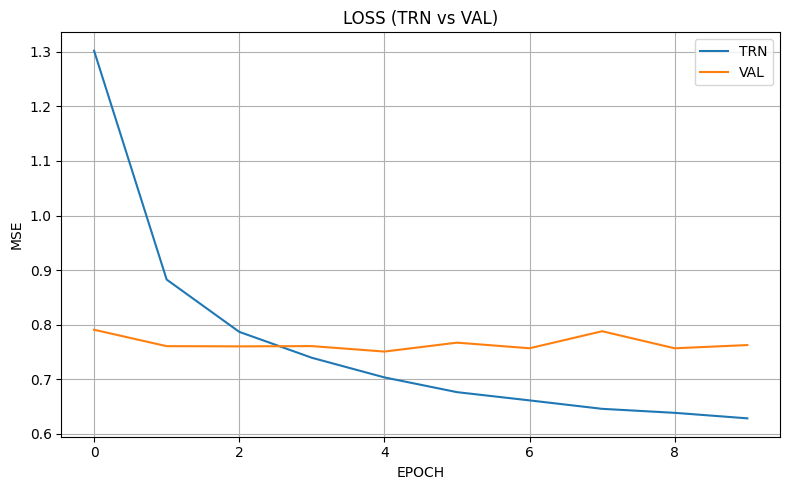

In [21]:
kwargs = dict(
    history=history,
    title="LOSS (TRN vs VAL)",
    metric="MSE",
)

UTILS.visualizer.versus_plot(**kwargs)

# Evaluating

In [22]:
kwargs = dict(
    model=model,
)

evaluator = EVALUATOR.evaluator.PerformanceEvaluator(**kwargs)

In [23]:
evaluator.evaluate(loaders["tst"])

MSE:		0.7616
RMSE(norm):	0.2497
MAE:		0.6681
MAPE:		0.2970
R2:		0.3044


# Save

In [24]:
PATH = f'./_checkpoints/{MODEL_NAME}.pth'

kwargs = dict(
    model=model,
    path=PATH,
)

UTILS.checkpointer.save(**kwargs)